# 加载包

In [1]:
import pandas as pd
import numpy as np

# https://seaborn.pydata.org/
import seaborn as sns

# https://matplotlib.org/
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# step 0: 读取数据

In [2]:
train_dataset = pd.read_csv('./data/train.csv')
test_dataset = pd.read_csv('./data/test.csv')

print('train dataset: %s, test dataset %s' %(str(train_dataset.shape), str(test_dataset.shape)) )
train_dataset.head(7)

train dataset: (891, 12), test dataset (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [3]:
test_dataset.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q



### Survived
生存与否, 0 = No, 1 = Yes

### Pclass (Ticket class)
票类别, 1 = 1st, 2 = 2nd, 3 = 3rd

### Name
姓名

### Sex
性别

### Age
年龄

### Sibsp
siblings / spouses 在船上的数量。
Sibling = brother, sister, stepbrother, stepsister.
Spouse = husband, wife.

### Parch
parents / children 在船上的数量。
Parent = mother, father.
Child = daughter, son, stepdaughter, stepson

### Ticket (Ticket number)
票号

### Fare (Passenger fare)
旅客票价

### Cabin (Cabin number)
客舱号
	
### Embarked (Port of Embarkation)
上船港口
C = Cherbourg 瑟堡, Q = Queenstown 昆斯敦, S = Southampton 南安普敦

# step 1: 数据观察 (EDA)
## 1.1 整体情况

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


### 数值型特征基本统计量

In [5]:
train_dataset.select_dtypes(exclude=['object']).describe().round(decimals=2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


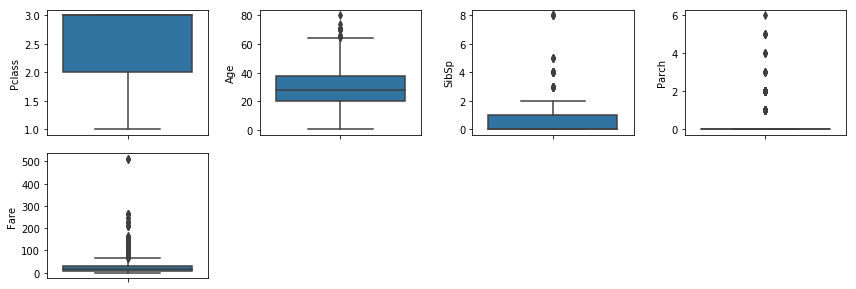

In [6]:
num_attributes = train_dataset.select_dtypes(exclude='object').drop('PassengerId', axis=1).drop('Survived', axis=1).copy()

fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

In [7]:
print(list(train_dataset['Age']))

[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, nan, 31.0, nan, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 28.0, 42.0, nan, 21.0, 18.0, 14.0, 40.0, 27.0, nan, 3.0, 19.0, nan, nan, nan, nan, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, nan, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, nan, nan, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, nan, nan, 0.83, 30.0, 22.0, 29.0, nan, 28.0, 17.0, 33.0, 16.0, nan, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, nan, 71.0, 23.0, 34.0, 34.0, 28.0, nan, 21.0, 33.0, 37.0, 28.0, 21.0, nan, 38.0, nan, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 70.5, 29.0, 24.0, 2.0, 21.0, nan, 32.5, 32.5, 54.0, 12.0, nan, 24.0, nan, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 16.0, 24.0, nan, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 9.0, 36.5, 42.0, 51.0, 22.0, 55.5, 40.5, nan, 51.0, 16.0, 30.0, nan, nan, 44.0, 40.0, 26.0, 17.0, 1.0, 9.0, nan, 45.0, nan, 28.0, 61.0, 4.0, 1.0, 21.0, 56.

### 非数值型特征基本统计量

In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [9]:
train_dataset.select_dtypes(include=['object']).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Vander Planke, Miss. Augusta Maria",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
train_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## 1.2 生存率 Y 的信息

In [11]:
is_survive = train_dataset[train_dataset["Survived"] == 1].shape[0]
print(f'Survived is 1 cnt: {is_survive}, ratio: {is_survive / train_dataset.shape[0]}')

not_survive = train_dataset[train_dataset["Survived"] == 0].shape[0]
print(f'Survived is 0 cnt: {not_survive}, ratio: {not_survive / train_dataset.shape[0]}')

Survived is 1 cnt: 342, ratio: 0.3838383838383838
Survived is 0 cnt: 549, ratio: 0.6161616161616161


### 生存率与特征关系

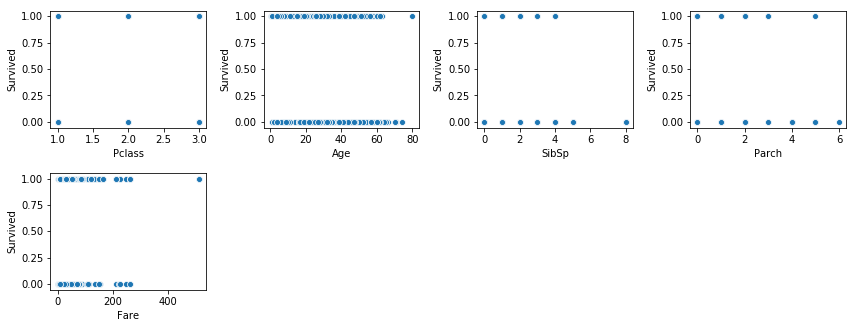

In [12]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], train_dataset["Survived"])
    
plt.tight_layout()
plt.show()

### Pclass 与生存率的关系

In [13]:
train_dataset.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [14]:
train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Sex 与生存率的关系

In [15]:
train_dataset.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
train_dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 数值型两两线性相关性

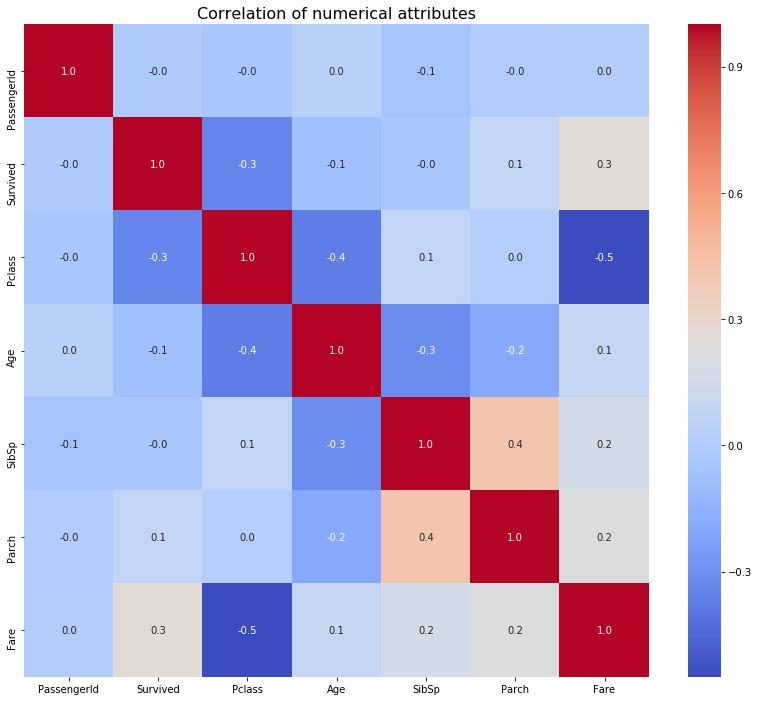

In [17]:
correlation = train_dataset.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, cmap = "coolwarm", annot=True, fmt='.1f')
plt.show()

In [18]:
correlation['Survived'].sort_values(ascending=False).head(15)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# step 2: 特征工程

In [19]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [20]:
# 将训练集和测试集简单合并方便处理
train_test_data = [train_dataset, test_dataset]

## 2.1 Pclass 特征
- 保持原状
- 也可以 one-hot 处理

## 2.2 Name 特征

In [21]:
train_dataset['Name'].value_counts()

Vander Planke, Miss. Augusta Maria                                                    1
Pinsky, Mrs. (Rosa)                                                                   1
Carter, Mrs. William Ernest (Lucile Polk)                                             1
Boulos, Mr. Hanna                                                                     1
Johansson, Mr. Karl Johan                                                             1
Simonius-Blumer, Col. Oberst Alfons                                                   1
Moran, Mr. James                                                                      1
Kantor, Mrs. Sinai (Miriam Sternin)                                                   1
Baclini, Miss. Helene Barbara                                                         1
Ryerson, Miss. Emily Borie                                                            1
Meyer, Mr. August                                                                     1
Ali, Mr. Ahmed                  

In [22]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [23]:
test_dataset.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr


In [24]:
train_dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Jonkheer      1
Countess      1
Ms            1
Mme           1
Lady          1
Sir           1
Don           1
Name: Title, dtype: int64

### 将类别少的称谓替换成 other
see https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [25]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
                                                'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_dataset['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [26]:
test_dataset['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

### 转换成 one-hot 特征

In [27]:
# DO NOT MAKE SENSE !
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
# train_dataset['Title'] = train_dataset['Title'].map(title_mapping)

In [28]:
dummies_Title = pd.get_dummies(train_dataset['Title'], prefix='Title')
train_dataset = pd.concat([train_dataset, dummies_Title], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0,0,0


In [29]:
dummies_Title = pd.get_dummies(test_dataset['Title'], prefix='Title')
test_dataset = pd.concat([test_dataset, dummies_Title], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0,1,0,0


In [30]:
# 删除特征
features_drop = ['Name', 'Title']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0


## 2.3 Sex 特征

In [31]:
train_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
dummies_Sex = pd.get_dummies(train_dataset['Sex'], prefix='Sex')
train_dataset = pd.concat([train_dataset, dummies_Sex], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0


In [33]:
dummies_Sex = pd.get_dummies(test_dataset['Sex'], prefix='Sex')
test_dataset = pd.concat([test_dataset, dummies_Sex], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0,1
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,1,0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0,1


In [34]:
# 删除特征
features_drop = ['Sex']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0


## 2.4 Age 特征

### 缺失值处理
- 缺值样本占比高，直接舍弃/转换
- 缺值样本适中，非连续特征属性，把 NaN 作为一个新类别
- 缺失样本不多，拟合填充，众数/均值/中值填充等
- see https://www.kaggle.com/alexisbcook/missing-values

In [35]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Age             714 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Other     891 non-null uint8
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(7)
memory usage: 65.3+ KB


In [36]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges 
    return df, rfr

train_dataset, rfr = set_missing_ages(train_dataset)

In [37]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Cabin           204 non-null object
Embarked        889 non-null object
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Other     891 non-null uint8
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
dtypes: float64(2), int64(5), object(3), uint8(7)
memory usage: 65.3+ KB


In [38]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Age             332 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            417 non-null float64
Cabin           91 non-null object
Embarked        418 non-null object
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
Title_Other     418 non-null uint8
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(7)
memory usage: 27.4+ KB


In [39]:
tmp_df = test_dataset[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test_dataset.Age.isnull()].values
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
test_dataset.loc[(test_dataset.Age.isnull()), 'Age' ] = predictedAges
test_dataset.head(7)

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0,1
1,893,3,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,1,0
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0,1
3,895,3,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,0,1
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1,0,1,0
5,897,3,14.0,0,0,7538,9.2250,NaN,S,0,0,1,0,0,0,1
6,898,3,30.0,0,0,330972,7.6292,NaN,Q,0,1,0,0,0,1,0


In [40]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId     418 non-null int64
Pclass          418 non-null int64
Age             418 non-null float64
SibSp           418 non-null int64
Parch           418 non-null int64
Ticket          418 non-null object
Fare            417 non-null float64
Cabin           91 non-null object
Embarked        418 non-null object
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
Title_Other     418 non-null uint8
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
dtypes: float64(2), int64(4), object(3), uint8(7)
memory usage: 27.4+ KB


### 分段
- 儿童，少年，青年，中年，老年

In [41]:
train_dataset['AgeBand'] = pd.qcut(train_dataset['Age'], 5)
train_dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.419, 19.0]",0.453039
1,"(19.0, 26.0]",0.335079
2,"(26.0, 31.0]",0.321212
3,"(31.0, 40.0]",0.430851
4,"(40.0, 80.0]",0.373494


In [42]:
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,AgeBand
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1,"(19.0, 26.0]"
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0,"(31.0, 40.0]"
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0,"(19.0, 26.0]"


In [43]:
train_dataset.loc[train_dataset['Age'] <= 19, 'Age'] = 0
train_dataset.loc[(train_dataset['Age'] > 19) & (train_dataset['Age'] <= 26), 'Age'] = 1
train_dataset.loc[(train_dataset['Age'] > 26) & (train_dataset['Age'] <= 31), 'Age'] = 2
train_dataset.loc[(train_dataset['Age'] > 31) & (train_dataset['Age'] <= 40), 'Age'] = 3
train_dataset.loc[train_dataset['Age'] > 40, 'Age'] = 4
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,AgeBand
0,1,0,3,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1,"(19.0, 26.0]"
1,2,1,1,3.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0,"(31.0, 40.0]"
2,3,1,3,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0,"(19.0, 26.0]"


In [44]:
test_dataset.loc[test_dataset['Age'] <= 19, 'Age'] = 0
test_dataset.loc[(test_dataset['Age'] > 19) & (test_dataset['Age'] <= 26), 'Age'] = 1
test_dataset.loc[(test_dataset['Age'] > 26) & (test_dataset['Age'] <= 31), 'Age'] = 2
test_dataset.loc[(test_dataset['Age'] > 31) & (test_dataset['Age'] <= 40), 'Age'] = 3
test_dataset.loc[test_dataset['Age'] > 40, 'Age'] = 4
test_dataset.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,892,3,3.0,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0,1
1,893,3,4.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,1,0
2,894,2,4.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0,1


In [45]:
# 删除特征
features_drop = ['AgeBand']
train_dataset = train_dataset.drop(features_drop, axis=1)
# test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,1,0,3,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,3.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0
2,3,1,3,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0


## 2.5 SibSp 和 Parch 特征
- 组合 SibSp 和 Parch 作为 FamilySize 特征
- see https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [46]:
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch']
test_dataset['FamilySize'] = test_dataset['SibSp'] + test_dataset['Parch']
train_dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [47]:
# 删除特征
features_drop = ['SibSp', 'Parch']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize
0,1,0,3,1.0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1,1
1,2,1,1,3.0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0,1
2,3,1,3,1.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0,0


## 2.6 Ticket 特征
- 删除

In [48]:
# 删除特征
features_drop = ['Ticket']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize
0,1,0,3,1.0,7.2500,NaN,S,0,0,1,0,0,0,1,1
1,2,1,1,3.0,71.2833,C85,C,0,0,0,1,0,1,0,1
2,3,1,3,1.0,7.9250,NaN,S,0,1,0,0,0,1,0,0


## 2.7 Fare 特征

In [49]:
# 具有一等票，二等票等属性

# 中值填充：大部分人买的票
test_dataset['Fare'] = test_dataset['Fare'].fillna(train_dataset['Fare'].median())

# 按照票价分为四份
train_dataset['FareBand'] = pd.qcut(train_dataset['Fare'], 4)
train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [50]:


train_dataset.loc[train_dataset['Fare'] <= 7.91, 'Fare'] = 0
train_dataset.loc[(train_dataset['Fare'] > 7.91) & (train_dataset['Fare'] <= 14.454), 'Fare'] = 1
train_dataset.loc[(train_dataset['Fare'] > 14.454) & (train_dataset['Fare'] <= 31), 'Fare']   = 2
train_dataset.loc[train_dataset['Fare'] > 31, 'Fare'] = 3
train_dataset['Fare'] = train_dataset['Fare'].astype(int)


test_dataset.loc[test_dataset['Fare'] <= 7.91, 'Fare'] = 0
test_dataset.loc[(test_dataset['Fare'] > 7.91) & (test_dataset['Fare'] <= 14.454), 'Fare'] = 1
test_dataset.loc[(test_dataset['Fare'] > 14.454) & (test_dataset['Fare'] <= 31), 'Fare']   = 2
test_dataset.loc[test_dataset['Fare'] > 31, 'Fare'] = 3
test_dataset['Fare'] = test_dataset['Fare'].astype(int)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_dataset[['Fare']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
train_dataset['Fare_scaled'] = scaler.transform(train_dataset[['Fare']])
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled
0,1,0,3,1.0,0,NaN,S,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000
1,2,1,1,3.0,3,C85,C,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000
2,3,1,3,1.0,1,NaN,S,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333


In [53]:
test_dataset['Fare_scaled'] = scaler.transform(test_dataset[['Fare']])
test_dataset.head(1)

,PassengerId,Pclass,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled
0,892,3,3.0,0,NaN,Q,0,0,1,0,0,0,1,0,0.0


In [54]:
# 删除特征
features_drop = ['Fare']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled
0,1,0,3,1.0,NaN,S,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000
1,2,1,1,3.0,C85,C,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000
2,3,1,3,1.0,NaN,S,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333


## 2.8 Cabin 特征
- 直接删除
- 转换特征

In [55]:
# 直接删除
# del train_dataset['Cabin']
# del test_dataset['Cabin']

In [56]:
# 转换特征
train_dataset['Has_Cabin'] = train_dataset["Cabin"].apply(lambda x: 'yes' if pd.isna(x) else 'no')

dummies_Cabin = pd.get_dummies(train_dataset['Has_Cabin'], prefix='Has_Cabin')
train_dataset = pd.concat([train_dataset, dummies_Cabin], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled,Has_Cabin,Has_Cabin_no,Has_Cabin_yes
0,1,0,3,1.0,NaN,S,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000,yes,0,1
1,2,1,1,3.0,C85,C,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000,no,1,0
2,3,1,3,1.0,NaN,S,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333,yes,0,1


In [57]:
test_dataset['Has_Cabin'] = test_dataset["Cabin"].apply(lambda x: 'yes' if pd.isna(x) else 'no')

dummies_Cabin = pd.get_dummies(test_dataset['Has_Cabin'], prefix='Has_Cabin')
test_dataset = pd.concat([test_dataset, dummies_Cabin], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Age,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin,Has_Cabin_no,Has_Cabin_yes
0,892,3,3.0,NaN,Q,0,0,1,0,0,0,1,0,0.000000,yes,0,1
1,893,3,4.0,NaN,S,0,0,0,1,0,1,0,1,0.000000,yes,0,1
2,894,2,4.0,NaN,Q,0,0,1,0,0,0,1,0,0.333333,yes,0,1


In [58]:
# 删除特征
features_drop = ['Cabin', 'Has_Cabin']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled,Has_Cabin_no,Has_Cabin_yes
0,1,0,3,1.0,S,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000,0,1
1,2,1,1,3.0,C,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000,1,0
2,3,1,3,1.0,S,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333,0,1


## 2.9 Embarked
- 众数填充

In [59]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [60]:
# 众数填充
train_dataset['Embarked'] = train_dataset['Embarked'].fillna('S')
test_dataset['Embarked'] = test_dataset['Embarked'].fillna('S')

In [61]:
dummies_Embarked = pd.get_dummies(train_dataset['Embarked'], prefix='Embarked')
train_dataset = pd.concat([train_dataset, dummies_Embarked], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,S,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000,0,1,0,0,1
1,2,1,1,3.0,C,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000,1,0,1,0,0
2,3,1,3,1.0,S,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333,0,1,0,0,1


In [62]:
dummies_Embarked = pd.get_dummies(test_dataset['Embarked'], prefix='Embarked')
test_dataset = pd.concat([test_dataset, dummies_Embarked], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Age,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,892,3,3.0,Q,0,0,1,0,0,0,1,0,0.000000,0,1,0,1,0
1,893,3,4.0,S,0,0,0,1,0,1,0,1,0.000000,0,1,0,0,1
2,894,2,4.0,Q,0,0,1,0,0,0,1,0,0.333333,0,1,0,1,0


In [63]:
# 删除特征
features_drop = ['Embarked']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000,0,1,0,0,1
1,2,1,1,3.0,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000,1,0,1,0,0
2,3,1,3,1.0,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333,0,1,0,0,1


In [64]:
test_dataset.head(3)

,PassengerId,Pclass,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,892,3,3.0,0,0,1,0,0,0,1,0,0.000000,0,1,0,1,0
1,893,3,4.0,0,0,0,1,0,1,0,1,0.000000,0,1,0,0,1
2,894,2,4.0,0,0,1,0,0,0,1,0,0.333333,0,1,0,1,0


In [65]:
train_dataset_with_passengerid = train_dataset.copy(deep=True)
features_drop = ['PassengerId']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,Survived,Pclass,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,FareBand,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,0,0,1,0,0,0,1,1,"(-0.001, 7.91]",0.000000,0,1,0,0,1
1,1,1,3.0,0,0,0,1,0,1,0,1,"(31.0, 512.329]",1.000000,1,0,1,0,0
2,1,3,1.0,0,1,0,0,0,1,0,0,"(7.91, 14.454]",0.333333,0,1,0,0,1


# step 3: 模型训练

In [66]:
X = train_dataset.drop(['Survived','FareBand'], axis=1)
y = train_dataset['Survived']
test = test_dataset

X.shape, y.shape, test.shape

((891, 16), (891,), (418, 16))

In [67]:
X.columns

Index(['Pclass', 'Age', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Sex_female', 'Sex_male', 'FamilySize', 'Fare_scaled',
       'Has_Cabin_no', 'Has_Cabin_yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [68]:
test.columns

Index(['Pclass', 'Age', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Sex_female', 'Sex_male', 'FamilySize', 'Fare_scaled',
       'Has_Cabin_no', 'Has_Cabin_yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

## 尝试不同 baseline 模型

In [69]:
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [70]:
# 训练集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Logistic Regression

In [71]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8263305322128851

In [72]:
# The cross_val_score returns the accuracy for all the folds
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.82681564, 0.82681564, 0.82022472, 0.80898876, 0.85310734])

In [73]:
print(scores.mean())

# extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance
print(scores.std())

0.8271904225390074
0.014503717918873277


### Random Forest

In [74]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

In [75]:
print(scores.mean())
print(scores.std())

0.8171220024774921
0.018095666968010574


## 超参数搜索
- see https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 2.0], 
    'penalty' : ['l1', 'l2']
}

clf = LogisticRegression()

grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid, 
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)
grid_search.fit(X, y)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1.0, 'penalty': 'l1'}
0.8294051627384961


## 特征重要性

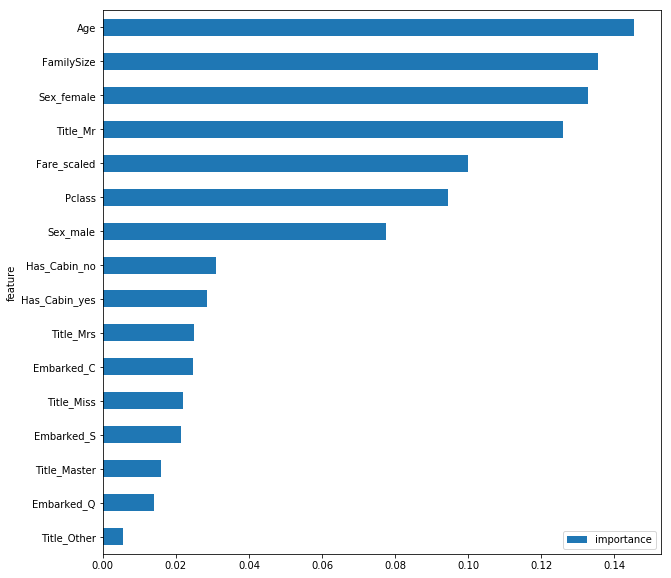

In [77]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10, 10))

## 混淆矩阵

Accuracy: 92 % 

Confusion Matrix in Numbers
[[312  16]
 [ 26 180]]

Confusion Matrix in Percentage
[[0.95 0.05]
 [0.13 0.87]]



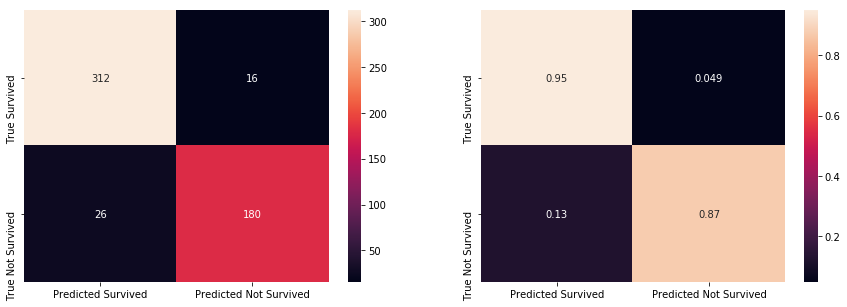

In [78]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

## 错误分类样本分析

In [81]:
from sklearn.model_selection import train_test_split
train_dataset_with_passengerid = train_dataset_with_passengerid.drop(['FareBand'], axis=1)
split_train, split_cv = train_test_split(train_dataset_with_passengerid, test_size=0.2, random_state=0)
#print(split_cv.shape)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(split_train.values[:,2:], split_train.values[:,1])

predictions = clf.predict(split_cv.values[:,2:])
#print(predictions)

origin_train_dataset = pd.read_csv('./data/train.csv')
bad_cases = origin_train_dataset.loc[origin_train_dataset['PassengerId'].isin(split_cv[predictions != split_cv.values[:,1]]['PassengerId'].values)]
#print(bad_cases.shape)
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C


# 学习率曲线
<img src="./learning_curve.png" style="zoom:50%">

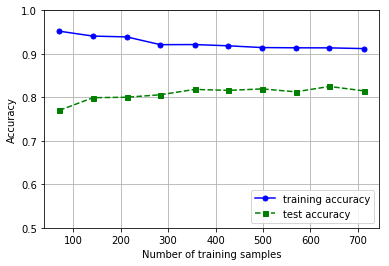

In [82]:
from sklearn.model_selection import learning_curve  
clf = RandomForestClassifier(n_estimators=100)
#clf = LinearSVC()
train_sizes,train_scores,test_scores=learning_curve(estimator=clf,X=X,y=y,
                                                    train_sizes=np.linspace(0.1,1.0,10),cv=5) 
train_mean= np.mean(train_scores,axis=1)
test_mean =np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='test accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')  
plt.ylim([0.5,1.0])
plt.show()

## 模型融合
- Bagging
- XGBoost

In [83]:
logreg = LogisticRegression()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, rf, gboost]

trained_models = []
for model in models:
    model.fit(X_train, y_train)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(X_test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

In [95]:
model.predict_proba(X_test)

array([[0.77, 0.23],
       [0.88, 0.12],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.61, 0.39],
       [0.03, 0.97],
       [0.05, 0.95],
       [0.51, 0.49],
       [0.07, 0.93],
       [0.94, 0.06],
       [0.09, 0.91],
       [0.87, 0.13],
       [0.16, 0.84],
       [0.05, 0.95],
       [0.4 , 0.6 ],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.81, 0.19],
       [0.05, 0.95],
       [0.89, 0.11],
       [0.08, 0.92],
       [0.92, 0.08],
       [0.61, 0.39],
       [0.51, 0.49],
       [0.01, 0.99],
       [0.88, 0.12],
       [0.42, 0.58],
       [0.1 , 0.9 ],
       [0.93, 0.07],
       [0.76, 0.24],
       [0.29, 0.71],
       [0.85, 0.15],
       [0.8 , 0.2 ],
       [0.92, 0.08],
       [0.2 , 0.8 ],
       [0.96, 0.04],
       [0.86, 0.14],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.87, 0.13],
       [0.84, 0.16],
       [0.91, 0.09],
       [0.94, 0.06],
       [0.02, 0.98],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.08,

In [94]:
predictions_df

,0,1,2,out
0,0.228809,0.400000,0.232739,0
1,0.066353,0.155087,0.118023,0
2,0.289499,0.000000,0.026823,0
3,0.967238,1.000000,0.991199,1
4,0.777306,0.900000,0.845849,1
5,0.324836,0.516667,0.386870,0
6,0.921758,1.000000,0.974969,1
7,0.850809,1.000000,0.951565,1
8,0.509324,0.800000,0.486589,1
9,0.864439,1.000000,0.933647,1
